In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd
import re
import shutil
from sklearn.model_selection import StratifiedKFold
import random
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (20,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 20}
plt.rc('font', **font)

In [20]:
HOME_FOLDER = '/media/scratch/astamoulakatos/nsea_video_jpegs/'

noOfFiles = 0
noOfDir = 0

In [21]:
for base, dirs, files in os.walk(HOME_FOLDER):
    print('Looking in : ',base)
    for directories in dirs:
        noOfDir += 1
    for Files in files:
        noOfFiles += 1

Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur/Survey-2-2012__Project 1__IC2__KP145.020-155.882_A__DATA_20121007061601500__20121007061602312@DVR-1_Ch2__96
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur/Survey-2-2012__Project 1__IC2__KP145.020-155.882_A__DATA_20121007081606000__20121007081607843@DVR-1_Ch2__218
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur/Survey-2-2012__Project 1__IC2__KP145.020-155.882_A__DATA_20121007084607641__20121007084609484@DVR-1_Ch2__200
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur/Survey-2-2012__Project 1__IC2__KP145.020-155.882_A__DATA_20121007061601500__20121007061602312@DVR-1_Ch2__100
Looking in :  /media/scratch/astamoulakatos/nsea_video_jpegs/bur/Survey-2-2012__Project 1__IC2__KP130.417-145.077_A__DATA_20120923212128015__20120923212128422@DVR-1_Ch2__307
Look

In [22]:
print('Number of files',noOfFiles)
print('Number of Directories',noOfDir)
print('Total:',(noOfDir + noOfFiles))

Number of files 59687
Number of Directories 470
Total: 60157


In [23]:
number_of_frames = []
event_path = []
for d in os.listdir(HOME_FOLDER):
    label_path = os.path.join(HOME_FOLDER,d)
    for l in os.listdir(label_path):
        file_path = os.path.join(label_path,l)
        #print(len(os.listdir(file_path)), file_path)
        number = len(os.listdir(file_path))
        number_of_frames.append(number) 
#         if number > 400:
#             shutil.rmtree(file_path)
#         else:
#             number_of_frames.append(number)                          
        event_path.append(file_path)

In [24]:
df = pd.DataFrame(columns = ['event_path', 'number_of_frames'])

In [25]:
df.event_path = event_path
df.number_of_frames = number_of_frames

In [26]:
df

,event_path,number_of_frames
0,/media/scratch/astamoulakatos/nsea_video_jpegs...,15
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,169
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,90
3,/media/scratch/astamoulakatos/nsea_video_jpegs...,618
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,151
...,...,...
460,/media/scratch/astamoulakatos/nsea_video_jpegs...,29
461,/media/scratch/astamoulakatos/nsea_video_jpegs...,35
462,/media/scratch/astamoulakatos/nsea_video_jpegs...,35
463,/media/scratch/astamoulakatos/nsea_video_jpegs...,55


In [41]:
df.number_of_frames.max()

366

In [28]:
df.number_of_frames.min()

13

In [29]:
df.number_of_frames.mean()

128.35913978494622

In [30]:
df['exposure'] = 0
df['burial'] = 0
df['field_joint'] = 0
df['anode'] = 0
df['free_span'] = 0

In [32]:
labels = []
for i in range(len(df)):
    #m = re.search('Ch2/(.+?)/S', str(df.event_path[i]))
    m = re.search('egs/(.+?)/S', str(df.event_path[i]))
    boom = m.group(1)
    if boom == 'exp_and':
        df.exposure[i] = 1
        df.anode[i] = 1
    if boom == 'exp':
        df.exposure[i] = 1
    if boom == 'bur':
        df.burial[i] = 1
    if boom == 'exp_fs':
        df.exposure[i] = 1
        df.free_span[i] = 1
    if boom == 'exp_fj':
        df.exposure[i] = 1
        df.field_joint[i] = 1
    labels.append(boom)

/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr

In [33]:
df['label'] = labels

In [34]:
df1 = df[['event_path','exposure','burial','field_joint','anode','free_span']]

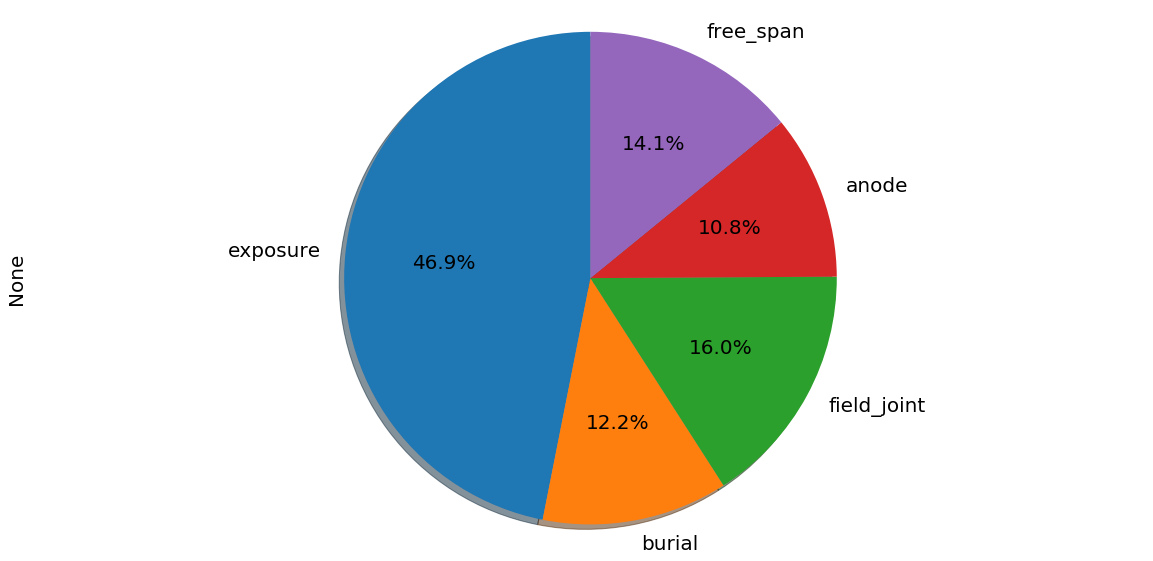

In [35]:
fig1, ax1 = plt.subplots()
df1.iloc[:,1:].sum(axis=0).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
ax1.axis("equal")
plt.show()

# events

In [43]:
df1.iloc[:,1:].sum(axis=0)

exposure       369
burial          96
field_joint    126
anode           85
free_span      111
dtype: int64

# frames

In [42]:
df.groupby('label')['number_of_frames'].sum()

label
bur        7962
exp        4122
exp_and    2998
exp_fj     5589
exp_fs     9430
Name: number_of_frames, dtype: int64

# exclude events with less than 50 frames (2 secs)

In [38]:
df.number_of_frames.min()

13

In [39]:
df = df[df.number_of_frames>=20]
df = df[df.number_of_frames<=400]

In [57]:
df.iloc[:,1:].sum(axis=0)

number_of_frames                                                30101
exposure                                                          355
burial                                                             66
field_joint                                                       126
anode                                                              82
free_span                                                         104
label               burburburburburburburburburburburburburburburb...
dtype: object

In [55]:
df

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,169,0,1,0,0,0,bur
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,90,0,1,0,0,0,bur
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,151,0,1,0,0,0,bur
5,/media/scratch/astamoulakatos/nsea_video_jpegs...,26,0,1,0,0,0,bur
6,/media/scratch/astamoulakatos/nsea_video_jpegs...,133,0,1,0,0,0,bur
...,...,...,...,...,...,...,...,...
460,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and
461,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and
462,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and
463,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and


In [56]:
df.label.unique()

array(['bur', 'exp_fs', 'exp', 'exp_fj', 'exp_and'], dtype=object)

# less exposure

In [58]:
df_exp = df[df.label=='exp']

In [59]:
df_exp = df_exp.sample(frac=0.6)

In [60]:
df_exp

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label
219,/media/scratch/astamoulakatos/nsea_video_jpegs...,83,1,0,0,0,0,exp
245,/media/scratch/astamoulakatos/nsea_video_jpegs...,60,1,0,0,0,0,exp
236,/media/scratch/astamoulakatos/nsea_video_jpegs...,146,1,0,0,0,0,exp
246,/media/scratch/astamoulakatos/nsea_video_jpegs...,341,1,0,0,0,0,exp
211,/media/scratch/astamoulakatos/nsea_video_jpegs...,46,1,0,0,0,0,exp
252,/media/scratch/astamoulakatos/nsea_video_jpegs...,173,1,0,0,0,0,exp
224,/media/scratch/astamoulakatos/nsea_video_jpegs...,30,1,0,0,0,0,exp
250,/media/scratch/astamoulakatos/nsea_video_jpegs...,98,1,0,0,0,0,exp
227,/media/scratch/astamoulakatos/nsea_video_jpegs...,30,1,0,0,0,0,exp
214,/media/scratch/astamoulakatos/nsea_video_jpegs...,27,1,0,0,0,0,exp


In [61]:
df_exp.number_of_frames.mean()

91.84615384615384

In [62]:
df_new = df[df.label!='exp']

In [63]:
df_final = pd.concat([df_new, df_exp])

In [64]:
df_final.reset_index(drop=True)

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label
0,/media/scratch/astamoulakatos/nsea_video_jpegs...,169,0,1,0,0,0,bur
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,90,0,1,0,0,0,bur
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,151,0,1,0,0,0,bur
3,/media/scratch/astamoulakatos/nsea_video_jpegs...,26,0,1,0,0,0,bur
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,133,0,1,0,0,0,bur
...,...,...,...,...,...,...,...,...
399,/media/scratch/astamoulakatos/nsea_video_jpegs...,49,1,0,0,0,0,exp
400,/media/scratch/astamoulakatos/nsea_video_jpegs...,57,1,0,0,0,0,exp
401,/media/scratch/astamoulakatos/nsea_video_jpegs...,142,1,0,0,0,0,exp
402,/media/scratch/astamoulakatos/nsea_video_jpegs...,23,1,0,0,0,0,exp


In [65]:
df_final.label.value_counts()

exp_fj     126
exp_fs     104
exp_and     82
bur         66
exp         26
Name: label, dtype: int64

In [66]:
df.label.value_counts()

exp_fj     126
exp_fs     104
exp_and     82
bur         66
exp         43
Name: label, dtype: int64

# frame sequences

In [67]:
df.groupby('label')['number_of_frames'].sum()

label
bur        7962
exp        4122
exp_and    2998
exp_fj     5589
exp_fs     9430
Name: number_of_frames, dtype: int64

# distribution of labels in events, not in sequences, not in frames

In [68]:
df1 = df[['event_path','exposure','burial','field_joint','anode','free_span']]

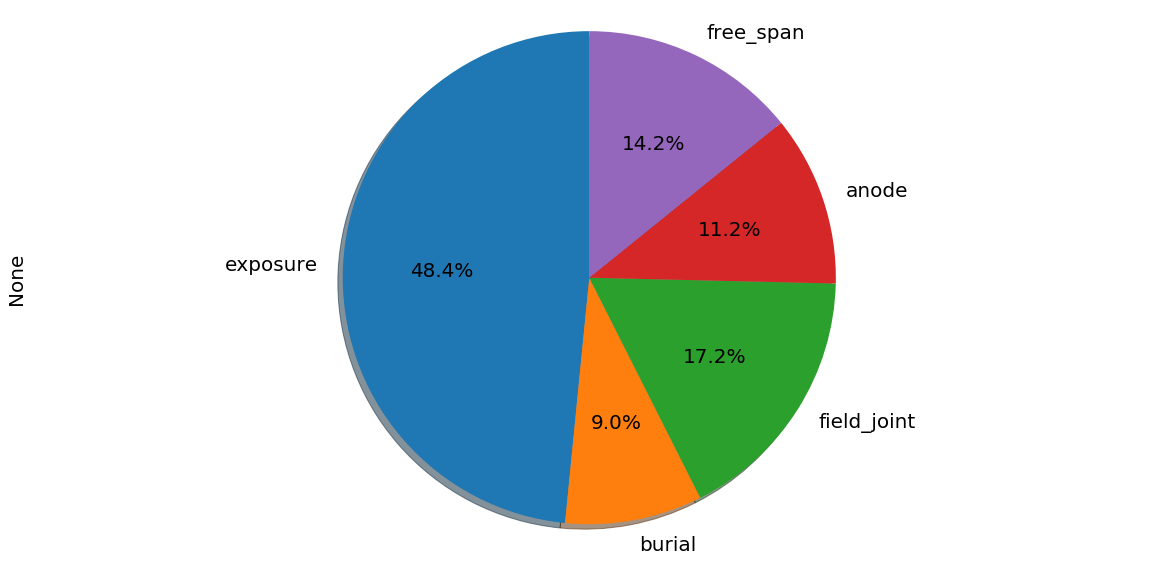

In [69]:
fig1, ax1 = plt.subplots()
df1.iloc[:,1:].sum(axis=0).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
ax1.axis("equal")
plt.show()

In [70]:
df.to_csv('../important_csvs/more_balanced_dataset/small_balanced.csv', index=False)

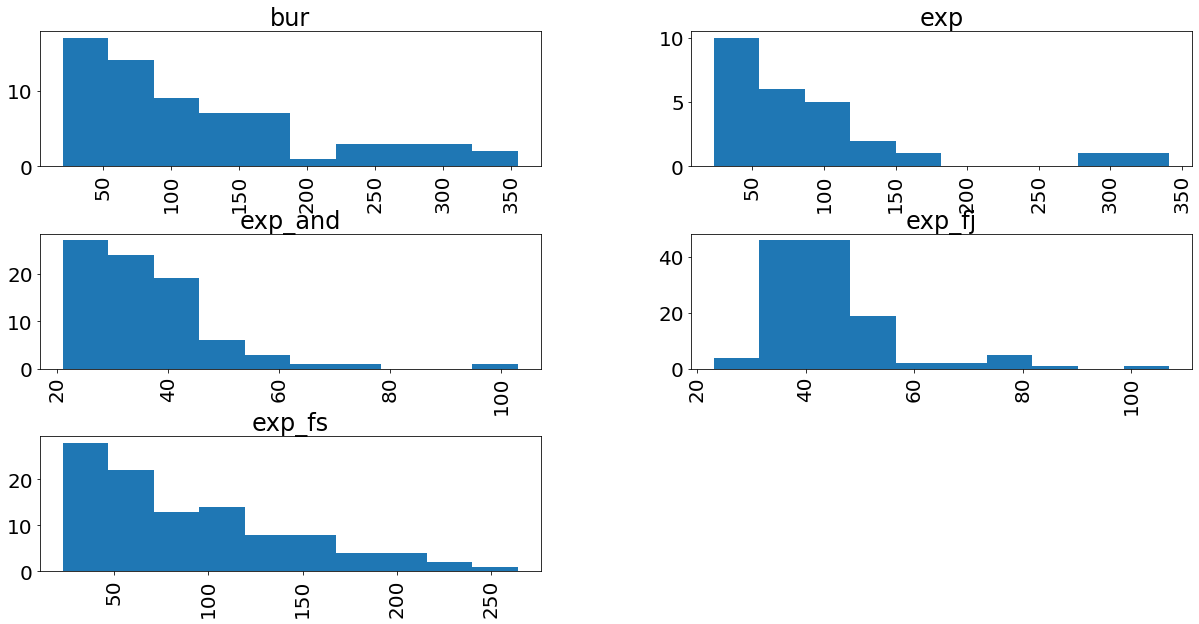

In [71]:
df_final['number_of_frames'].hist(by=df.label)
plt.show()

# stratification

In [73]:
#df = df_final

In [74]:
df.reset_index(drop=True)

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label
0,/media/scratch/astamoulakatos/nsea_video_jpegs...,169,0,1,0,0,0,bur
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,90,0,1,0,0,0,bur
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,151,0,1,0,0,0,bur
3,/media/scratch/astamoulakatos/nsea_video_jpegs...,26,0,1,0,0,0,bur
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,133,0,1,0,0,0,bur
...,...,...,...,...,...,...,...,...
416,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and
417,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and
418,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and
419,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and


In [75]:
SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED)

In [76]:
skf = StratifiedKFold(n_splits=5)

In [77]:
df['fold'] = 0

In [78]:
g = df.groupby('label')

In [79]:
i = g['number_of_frames'].quantile([0.05, 0.25, 0.5, 0.9]).unstack()
j = g['number_of_frames'].agg(['min', 'max'])

In [80]:
pd.concat([i, j], 1)

,0.05,0.25,0.5,0.9,min,max
label,,,,,,
bur,26.25,50.25,92.5,272.0,20,355
exp,27.00,44.00,78.0,172.0,23,366
exp_and,24.00,28.00,34.0,51.0,21,103
exp_fj,32.25,36.00,42.0,56.0,23,107
exp_fs,31.00,46.00,76.0,168.4,23,264


In [81]:
values = [92.5, 78.0, 34.0, 56.0, 168.4]

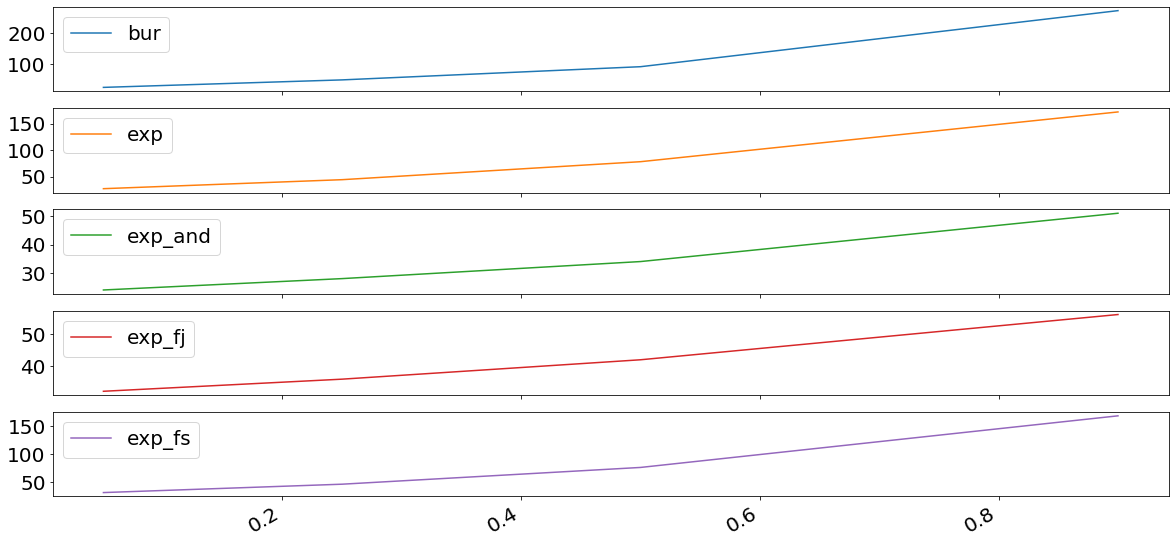

In [82]:
i.T.plot(subplots=True)
plt.show()

In [83]:
df['stratify_group'] = 'yo'

In [84]:
labels = df.label.unique()

In [85]:
for l, v in zip(labels, values):
    df.loc[df.label==l, 'stratify_group'] = np.char.add(
        df.loc[df.label==l, 'label'].values.astype(str),
        df.loc[df.label==l, 'number_of_frames'].apply(lambda x: f'_{int(x // v)}').values.astype(str)
    )

In [86]:
df

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,169,0,1,0,0,0,bur,0,bur_1
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,90,0,1,0,0,0,bur,0,bur_0
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,151,0,1,0,0,0,bur,0,bur_1
5,/media/scratch/astamoulakatos/nsea_video_jpegs...,26,0,1,0,0,0,bur,0,bur_0
6,/media/scratch/astamoulakatos/nsea_video_jpegs...,133,0,1,0,0,0,bur,0,bur_1
...,...,...,...,...,...,...,...,...,...,...
460,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and,0,exp_and_0
461,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,0,exp_and_0
462,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,0,exp_and_0
463,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and,0,exp_and_0


In [87]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['event_path'], y=df['stratify_group'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

/home/astamoulakatos/.conda/envs/deep/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [88]:
df.to_csv('../important_csvs/more_balanced_dataset/small_stratified.csv', index=False)

In [89]:
df.fold.value_counts()

0    85
4    84
3    84
2    84
1    84
Name: fold, dtype: int64

In [90]:
df.stratify_group.value_counts()

exp_fj_0     111
exp_and_0     82
exp_fs_0      52
exp_fs_1      37
bur_0         33
bur_1         21
exp_fj_1      15
exp_fs_2      13
exp_1         10
exp_2         10
exp_0         10
bur_2          7
bur_3          5
exp_3          5
exp_4          3
exp_fs_3       2
exp_10         2
exp_9          1
exp_5          1
exp_8          1
Name: stratify_group, dtype: int64

In [91]:
df = pd.read_csv('../important_csvs/more_balanced_dataset/small_stratified.csv')

In [5]:
df = df.sample(frac=0.5)

In [92]:
df = df.reset_index(drop=True)

In [93]:
df

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
0,/media/scratch/astamoulakatos/nsea_video_jpegs...,169,0,1,0,0,0,bur,0,bur_1
1,/media/scratch/astamoulakatos/nsea_video_jpegs...,90,0,1,0,0,0,bur,0,bur_0
2,/media/scratch/astamoulakatos/nsea_video_jpegs...,151,0,1,0,0,0,bur,0,bur_1
3,/media/scratch/astamoulakatos/nsea_video_jpegs...,26,0,1,0,0,0,bur,0,bur_0
4,/media/scratch/astamoulakatos/nsea_video_jpegs...,133,0,1,0,0,0,bur,0,bur_1
...,...,...,...,...,...,...,...,...,...,...
416,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and,4,exp_and_0
417,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0
418,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0
419,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and,4,exp_and_0


In [94]:
df.fold.value_counts()

0    85
4    84
3    84
2    84
1    84
Name: fold, dtype: int64

In [95]:
df.label.value_counts()

exp_fj     126
exp_fs     104
exp_and     82
bur         66
exp         43
Name: label, dtype: int64

In [ ]:
for i in range(len(df)):
    if (df.label[i] != 'exp'):
        df.exposure[i] = 0

In [ ]:
df

In [ ]:
df.to_csv('../important_csvs/more_balanced_dataset/small_set_multi_class.csv', index=False)

In [96]:
df.number_of_frames.min()

20

In [97]:
df.number_of_frames.max()

366

In [15]:
df = df[df.number_of_frames>=100]

In [16]:
df

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
0,/media/scratch/astamoulakatos/centre_Ch2/bur/S...,400,0,1,0,0,0,bur,0,bur_1
1,/media/scratch/astamoulakatos/centre_Ch2/bur/S...,400,0,1,0,0,0,bur,0,bur_1
2,/media/scratch/astamoulakatos/centre_Ch2/bur/S...,102,0,1,0,0,0,bur,0,bur_0
3,/media/scratch/astamoulakatos/centre_Ch2/bur/S...,400,0,1,0,0,0,bur,0,bur_1
4,/media/scratch/astamoulakatos/centre_Ch2/bur/S...,175,0,1,0,0,0,bur,0,bur_0
...,...,...,...,...,...,...,...,...,...,...
1432,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
1433,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
1434,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
1435,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,358,1,0,0,0,0,exp,4,exp_1


In [23]:
df.label.value_counts()

bur        315
exp_fj     257
exp_fs     239
exp        236
exp_and     53
Name: label, dtype: int64

# less exposure

In [25]:
df_exp = df[df.label=='exp']

In [24]:
df_exp = df_exp.sample(frac=0.25)

NameError: name 'df_exp' is not defined

In [17]:
df_exp

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
540,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
460,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
94,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,1,exp_1
203,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,2,exp_1
674,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,0,exp_1
332,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,3,exp_1
599,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,0,exp_1
372,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,0,exp_1
144,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,0,exp_1
180,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,1,exp_1


In [18]:
df_exp.number_of_frames.mean()

390.5416666666667

In [19]:
df_new = df[df.label!='exp']

In [20]:
df_final = pd.concat([df_new, df_exp])

In [21]:
df_final.reset_index(drop=True)

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
0,/media/scratch/astamoulakatos/centre_Ch2/exp_f...,107,1,0,1,0,0,exp_fj,4,exp_fj_1
1,/media/scratch/astamoulakatos/centre_Ch2/exp_f...,152,1,0,1,0,0,exp_fj,3,exp_fj_1
2,/media/scratch/astamoulakatos/centre_Ch2/exp_f...,117,1,0,1,0,0,exp_fj,2,exp_fj_1
3,/media/scratch/astamoulakatos/centre_Ch2/exp_f...,161,1,0,1,0,0,exp_fj,0,exp_fj_1
4,/media/scratch/astamoulakatos/centre_Ch2/exp_f...,203,1,0,0,0,1,exp_fs,4,exp_fs_0
...,...,...,...,...,...,...,...,...,...,...
435,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,265,1,0,0,0,0,exp,4,exp_0
436,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,0,exp_1
437,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,4,exp_1
438,/media/scratch/astamoulakatos/centre_Ch2/exp/S...,400,1,0,0,0,0,exp,1,exp_1


In [22]:
df_final.label.value_counts()

bur        149
exp_fj     123
exp_fs     120
exp         24
exp_and     24
Name: label, dtype: int64